# under samplenig edited knn   EN feeding divid by kg featers:


In [1]:
from pycaret.classification import *


In [2]:
import pandas as pd
import numpy as np
dataset=pd.read_excel("C:/Users/97254/Downloads/patient_new.xlsx", engine='openpyxl')
print(dataset.shape)

(867, 70)


In [3]:
dataset = dataset[~dataset['age'].isin(['NAN'])]

In [4]:
target = dataset[['ICU_mortality']]

target.head()

,ICU_mortality
0,0
1,0
2,0
3,0
4,0


In [5]:

dataset = dataset[['age','BMI','APACHEII','trauma','metabolic','gastrointestinal','Sepsis','EN_pro_day0/kg','EN_pro_day1/kg','EN_pro_day2/kg','EN_pro_day3/kg','EN_pro_day4/kg','EN_pro_day5/kg'   
    ]]
print(dataset.shape)

(834, 13)


# under_sampling

In [13]:
from imblearn.under_sampling import EditedNearestNeighbours
  
#Edited Nearest Neighbours: This algorithm removes any sample which has labels different from those of its adjoining classes.
#pramaters to use:(ratio='auto', return_indices=False, random_state=None, size_ngh=None, n_neighbors=3, kind_sel='all', n_jobs=1)
en = EditedNearestNeighbours()
dataset, target = en.fit_resample(dataset, target)

In [15]:
dataset.head()

,age,BMI,APACHEII,trauma,metabolic,gastrointestinal,Sepsis,EN_pro_day0/kg,EN_pro_day1/kg,EN_pro_day2/kg,EN_pro_day3/kg,EN_pro_day4/kg,EN_pro_day5/kg
0,98,20.761246,19,0,0,1,1,0.000000,0.032933,1.216000,1.058089,1.207556,1.077511
1,61,24.973985,0,0,0,0,0,0.898489,1.461311,1.629356,1.054665,0.989735,1.217689
2,19,23.661439,7,1,0,0,0,0.542857,1.197905,0.002171,0.179443,0.538329,0.000000
3,27,24.691358,0,0,1,0,0,0.000000,0.816850,1.116000,1.116000,1.116000,1.116000
4,65,27.681661,0,1,1,1,1,0.290076,1.209876,1.093609,0.371767,0.000000,0.000000


In [16]:

downsampled = pd.concat([dataset, target],axis=1)

# checking counts
downsampled.ICU_mortality.value_counts()

0    200
1    143
Name: ICU_mortality, dtype: int64

In [17]:
downsampled.shape

(343, 14)

In [19]:
data = downsampled
#data_unseen = downsampled.drop(data.index)
data.head()

,age,BMI,APACHEII,trauma,metabolic,gastrointestinal,Sepsis,EN_pro_day0/kg,EN_pro_day1/kg,EN_pro_day2/kg,EN_pro_day3/kg,EN_pro_day4/kg,EN_pro_day5/kg,ICU_mortality
0,98,20.761246,19,0,0,1,1,0.000000,0.032933,1.216000,1.058089,1.207556,1.077511,0
1,61,24.973985,0,0,0,0,0,0.898489,1.461311,1.629356,1.054665,0.989735,1.217689,0
2,19,23.661439,7,1,0,0,0,0.542857,1.197905,0.002171,0.179443,0.538329,0.000000,0
3,27,24.691358,0,0,1,0,0,0.000000,0.816850,1.116000,1.116000,1.116000,1.116000,0
4,65,27.681661,0,1,1,1,1,0.290076,1.209876,1.093609,0.371767,0.000000,0.000000,0


In [29]:
from sklearn.model_selection import train_test_split
#this function randomly split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,:13], data.iloc[:,13], test_size=.2)
#test_size=.3 means that our test set will be 30% of the train set.
x_train.head()

,age,BMI,APACHEII,trauma,metabolic,gastrointestinal,Sepsis,EN_pro_day0/kg,EN_pro_day1/kg,EN_pro_day2/kg,EN_pro_day3/kg,EN_pro_day4/kg,EN_pro_day5/kg
23,66,27.343750,21,0,1,0,0,0.510880,0.905292,0.905143,0.905143,0.705886,0.000000
74,66,27.548209,22,0,1,0,1,0.604622,0.972800,0.972800,0.966720,0.972800,0.973813
73,37,27.755102,0,1,0,0,1,0.984809,1.189402,0.304012,0.962976,1.329925,1.489863
186,58,30.299205,0,0,0,1,0,0.000000,0.045946,0.354583,0.000000,0.063941,0.118747
327,40,22.640865,0,0,0,1,1,0.443208,0.534906,1.467170,3.121811,4.340377,0.026491


In [30]:
data = pd.concat([x_train, y_train],axis=1)
data.head()

,age,BMI,APACHEII,trauma,metabolic,gastrointestinal,Sepsis,EN_pro_day0/kg,EN_pro_day1/kg,EN_pro_day2/kg,EN_pro_day3/kg,EN_pro_day4/kg,EN_pro_day5/kg,ICU_mortality
23,66,27.343750,21,0,1,0,0,0.510880,0.905292,0.905143,0.905143,0.705886,0.000000,0
74,66,27.548209,22,0,1,0,1,0.604622,0.972800,0.972800,0.966720,0.972800,0.973813,0
73,37,27.755102,0,1,0,0,1,0.984809,1.189402,0.304012,0.962976,1.329925,1.489863,0
186,58,30.299205,0,0,0,1,0,0.000000,0.045946,0.354583,0.000000,0.063941,0.118747,0
327,40,22.640865,0,0,0,1,1,0.443208,0.534906,1.467170,3.121811,4.340377,0.026491,1


# models exploration

In [31]:
from pycaret.classification import *
model_setup = setup(data=data, target='ICU_mortality', data_split_stratify = True)


,Description,Value
0,session_id,7060
1,Target,ICU_mortality
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(219, 14)"
5,Missing Values,False
6,Numeric Features,9
7,Categorical Features,4
8,Ordinal Features,False
9,High Cardinality Features,False


In [32]:
best = compare_models()
print(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.7179,0.8112,0.6000,0.6938,0.6234,0.4066,0.4233,0.0080
gbc,Gradient Boosting Classifier,0.6871,0.7154,0.5762,0.6319,0.5833,0.3431,0.3587,0.0240
lightgbm,Light Gradient Boosting Machine,0.6679,0.7149,0.5167,0.6368,0.5535,0.3041,0.3157,0.0080
dt,Decision Tree Classifier,0.6550,0.6422,0.5190,0.6249,0.5385,0.2826,0.2982,0.0060
rf,Random Forest Classifier,0.6483,0.7431,0.5167,0.5849,0.5314,0.2635,0.2704,0.0640
et,Extra Trees Classifier,0.6287,0.7143,0.4690,0.6325,0.5030,0.2227,0.2474,0.0630
ada,Ada Boost Classifier,0.6208,0.6169,0.4667,0.5809,0.4899,0.2062,0.2224,0.0260
nb,Naive Bayes,0.5887,0.6138,0.5167,0.5026,0.5049,0.1530,0.1568,0.0050
qda,Quadratic Discriminant Analysis,0.5733,0.5738,0.5119,0.5246,0.4988,0.1360,0.1411,0.0100
svm,SVM - Linear Kernel,0.5683,0.0000,0.5381,0.3065,0.3855,0.1275,0.1623,0.0060


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


# knn

In [33]:
#for more info: https://pycaret.org/tune-model/
model = create_model("knn")
tuned_rf = tune_model(model, optimize = 'Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8125,0.8016,0.7143,0.8333,0.7692,0.6129,0.6181
1,0.9375,0.9286,0.8571,1.0000,0.9231,0.8710,0.8783
2,0.8125,0.7857,0.5714,1.0000,0.7273,0.6000,0.6547
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.8667,0.8611,0.8333,0.8333,0.8333,0.7222,0.7222
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.7333,0.6944,0.5000,0.7500,0.6000,0.4118,0.4308
7,0.8667,0.8889,1.0000,0.7500,0.8571,0.7368,0.7638
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,0.8000,0.7946,0.7143,0.8333,0.7692,0.5946,0.6001


# ROC

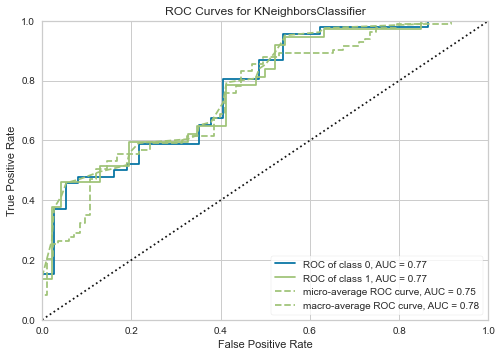

In [27]:
plot_model(tuned_rf, plot = 'auc')

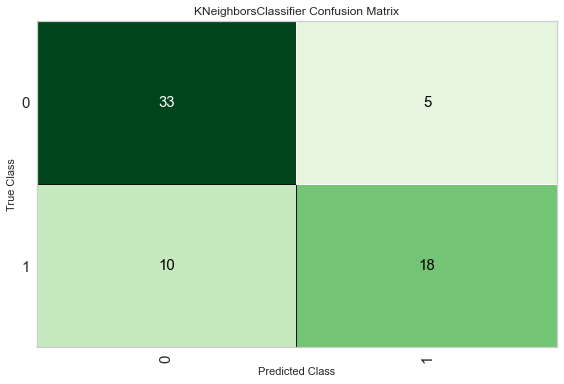

In [34]:
plot_model(tuned_rf, plot = 'confusion_matrix')

In [35]:
#List Hyperparameters that we want to tune.
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = [1,10,20]
p=[1,2]
#Convert to dictionary
hyperparameters = dict( n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10,scoring="recall")
#Fit the model
best_model = clf.fit(data.iloc[:,:13], data.iloc[:,13])
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 30
Best p: 1
Best n_neighbors: 1


In [36]:
print( best_model.best_score_)


0.7555555555555555


In [37]:
y_pred = best_model.best_estimator_.predict(x_test)
from sklearn.metrics import confusion_matrix
print (confusion_matrix(y_test, y_pred))

[[26  1]
 [10 18]]
